In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from array_io import *
from matplotlib import rc
from matplotlib import patches as patches
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [2]:
fname = "correlation.txt"
r,DD,DR,RR,CR,CC = read_six_arrays(fname)
w_r = (DD-2*DR+RR)/RR
w_c = (CC-2*CR+RR)/RR

s_w_r = w_r.copy()
#for i in range(len(s_w_r)):
s_w_r[:] = (DD/RR**2 + 4*DR/RR**2 + RR*((DD-2*DR)/RR**2)**2)**0.5
    
s_w_c = w_c.copy()
#for i in range(len(s_w_c)):
s_w_c[:] = (CC/RR**2 + 4*CR/RR**2 + RR*((CC-2*CR)/RR**2)**2)**0.5
    
print min(w_r)
print min(w_c)
print w_r/s_w_r

fi = np.where( (r>3.0e-3)&(r<=0.2))[0]

log_r = np.log(r)
log_w = np.log(w_r)

pfit = np.polyfit(log_r[fi], log_w[fi], 1)
print pfit

-0.309089009065
-0.203389830508
[  2.83457254   6.1933689    8.16905209  12.02528225  15.54760966
  19.3950605   21.94829241  25.03683335  29.27259205  32.26210688
  38.76734143  38.52138698  42.70686943  45.63236755  49.26755619
  52.03316682  55.00195989  57.76399857  60.29742168  63.41463856
  65.60410297  69.45831299  68.36226319  71.4627059   72.64656632
  73.73017154  74.49344243  75.42262379  75.2550668   73.06683976
  73.29850863  68.41348181  66.84380524  68.98193566  66.23643945
  63.93627527  61.35059166  60.33956493  60.23387329  57.90898892
  52.04385028  53.03798526  49.23623789  48.79520231  47.80098361
  45.17003228  42.67313414  41.07986633  40.93600258  35.99678009
  33.53644503  29.33507446  29.40693246  24.30895175  22.46200824
  18.35561106  15.19225357  11.87370624   7.48336603   6.20788853
   4.45113155   4.82125034   4.4045932    0.15514225   1.62816079
  -1.78532589  -1.87260087  -2.83798276  -2.49549781  -5.2062645
 -10.01888498  -8.58496821  -7.45972614  -6.8

/Library/Python/2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in log


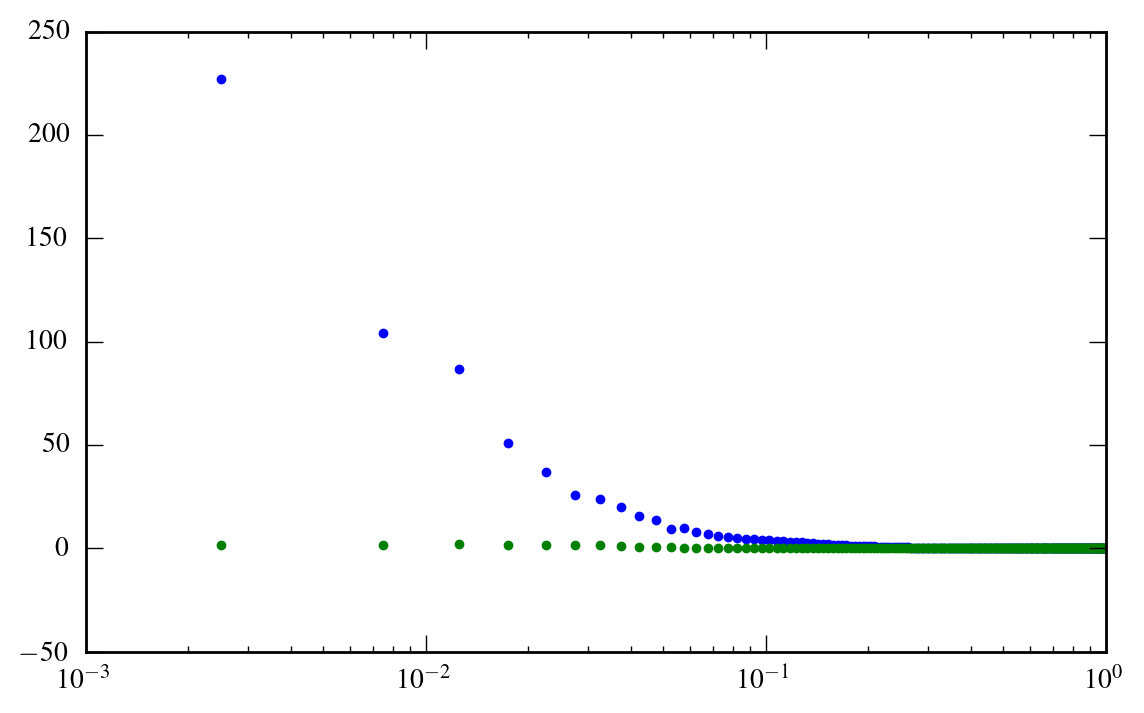

In [3]:
plt.plot(r,np.abs(w_r),'.')
plt.plot(r,w_c,'.')


#plt.yscale('log')
plt.xscale('log')

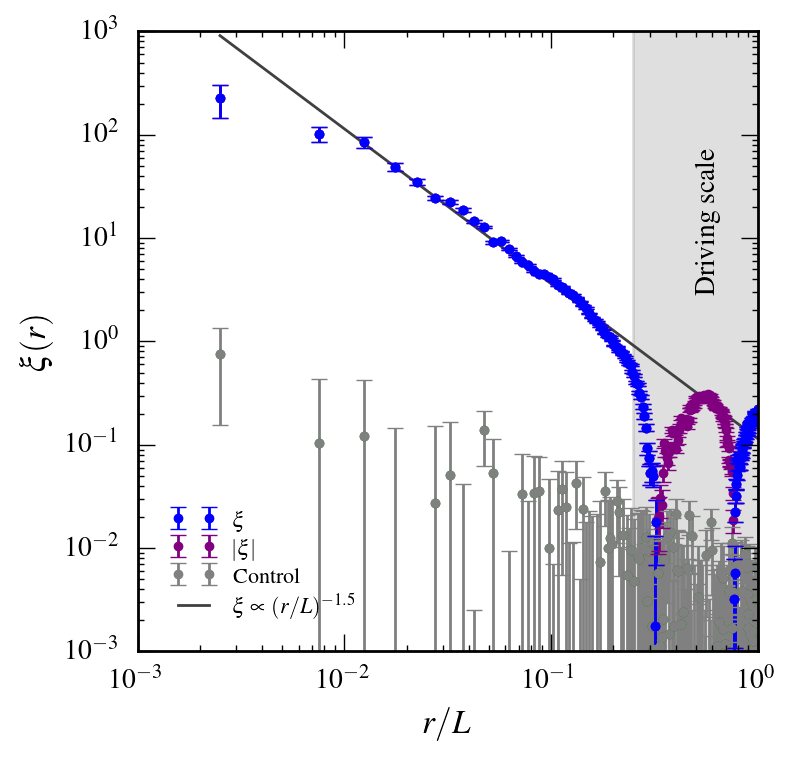

In [26]:
plt.plot(r,w_r,'.')
plt.plot(r,w_c,'.')



plt.errorbar(r,w_c,yerr=s_w_c,fmt='.',color="0.5", label=r"Control")
plt.axes().add_patch(patches.Rectangle((0.25,1.0e-3),1.,1.e3,color="gray",alpha=0.25))
plt.plot(r,np.exp(pfit[1])*(r**pfit[0]),color="0.25",label=r"$\xi\propto(r/L)^{-1.5}$")
plt.errorbar(r,np.abs(w_r),yerr=s_w_r,fmt='.',color="purple",label=r"$|\xi|$")
plt.errorbar(r,w_r,yerr=s_w_r,fmt='.',color="blue",label=r"$\xi$")

handles, labels = plt.axes().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc=3,frameon=False,fontsize=8)
plt.text(0.5,50.,"Driving scale",rotation=90)
plt.xlabel(r"$r/L$")
plt.ylabel(r"$\xi(r)$")
plt.xlim([1.0e-3,1])
plt.ylim([1.0e-3,1e3])
plt.yscale('log')
plt.xscale('log')
#plt.axes().set_adjustable("datalim")
plt.axes().set_aspect(0.5)
#plt.axes().set_aspect('')
plt.savefig(filename="correlation_function.png",bbox_inches="tight")

In [6]:
A = np.exp(pfit[1])
gamma = pfit[0]

In [7]:
print A, gamma

0.114712423952 -1.49882201382


In [8]:
# 1 = A r^gamma
# r = exp((log A^-1)/gamma )
r0 = np.exp(np.log(1./A)/gamma)
print r0

0.235820149591
